<a href="https://colab.research.google.com/github/TadieB/pytorch-collab/blob/main/DeepCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import os
import torch
import torchvision
import tarfile

from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

# Downloading the Dataset from url

+ png format images from fast.ai page

In [3]:
# download dataset
dataset_url = 'https://files.fast.ai/data/examples/cifar10.tgz'
download_url(dataset_url,'cifa10')

Using downloaded and verified file: cifa10/cifar10.tgz


+ The extracted dataset is saved to the directory data/cifar10
+ cifar10 contains two folders: train, test
+ Each of them contains 10 foldes, one for each class of images.

# Extracting the .tgz Dataset

In [4]:
# Extract from archive
with tarfile.open('./cifa10/cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data')

# Exploring the Dataset & Directory

In [5]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'labels.txt', 'train']
['truck', 'cat', 'automobile', 'horse', 'ship', 'dog', 'deer', 'bird', 'frog', 'airplane']


In [6]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print("No. of training examples for airplanes:", len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['17115_airplane.png', '16965_airplane.png', '25330_airplane.png', '25746_airplane.png', '25616_airplane.png']


In [7]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of training examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of training examples for ship: 1000
['1075_ship.png', '6684_ship.png', '1471_ship.png', '404_ship.png', '1205_ship.png']


+ the above folder /directory/ structure (one for each class) is common in computer vision
+ DL libraries povide utilities for working with such datasets.
+ use ImageFolder class from torchvision to load the data as pytorch tensors.

# Visualize the Training Set

In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [9]:
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())

In [26]:
dataset[0]

(tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          ...,
          [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
          [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
          [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],
 
         [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
          [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
          [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
          ...,
          [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
          [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
          [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],
 
         [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
          [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
          [0.9686, 0.9686, 0.9765,  ...,

In [18]:
data_dir

'./data/cifar10'

+ each element from the training set is a tuple containing an image tensor and a label
(imagetensor, label)

In [10]:
img, label = dataset[0]
print(img.shape, label)
#img

torch.Size([3, 32, 32]) 0


In [11]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [22]:
f = open("./data/cifar10/labels.txt", "r")
print(f.read())

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck



+ Changing the Tenso Dimensions to (32,32,3)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_example(img, label):
  print('Label: ', dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

+ The permute(1, 2, 0) operation swaps the dimensions in such a way that the tensor is rearranged to (H, W, C).

+ C = no. of channels , H = height, W = weight

Label:  airplane (0)


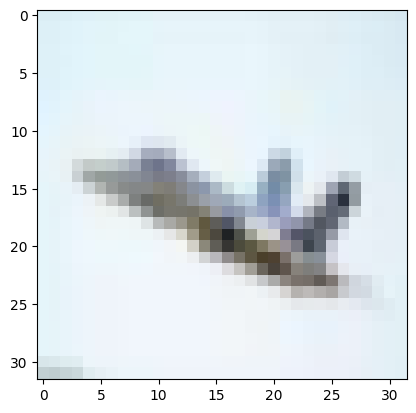

In [13]:
img, label = dataset[0]
show_example(img, label)

Label:  bird (2)


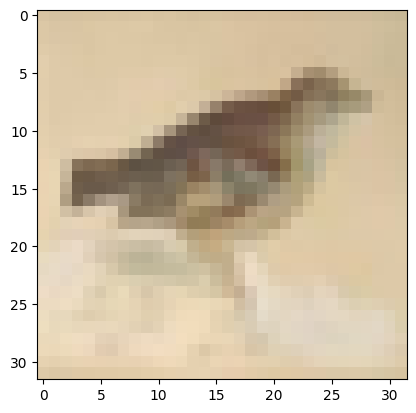

In [14]:
show_example(*dataset[10099])

# Training and Validation Datasets

+ Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.

+ Validation set - used to evaluate the model while training, adjust hypepaameters (learning rate, reg, etc) and pick the best vesion of the model.

+ Test set - used to compare diffeent models, or different types of modeling approaches, and report the final accuracy of the model.

In [15]:
random_seed = 42
torch.manual_seed(random_seed)
# Using the same seed ensures that random operations,
# like initializing weights or shuffling data,
# will produce the same results each time the code is run.

In [16]:
val_size = 5000
train_size = len(dataset)-val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [17]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

+ Our suggested max number of worker in current system is 2,

In [18]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(train_ds, batch_size*2, num_workers=2,pin_memory=True)

+ Use make_grid to look at batches of images from the dataset.

In [19]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

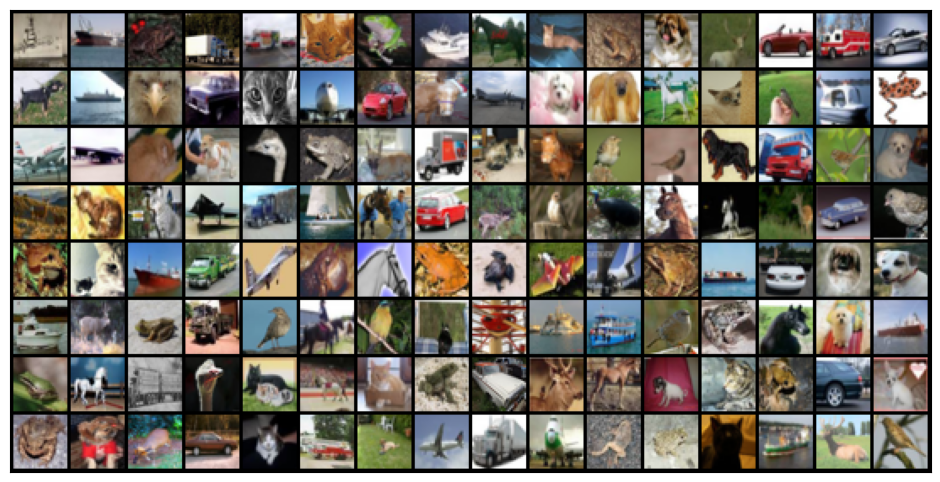

In [20]:
show_batch(train_dl)

# CNN

In [21]:
def apply_kernel(image, kernel):
  ri,ci = image.shape
  rk,ck = kernel.shape
  ro,co = ri-rk+1, ci-ck+1 # output dimention, kernel*image
  output = torch.zeros([ro,co])
  for i in range(ro):
    for j in range(co):
      output[i,j] = torch.sum(image[i:i+rk,j:j+ck]*kernel)
  return output

In [22]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0],
    [0, 0, 1, 3, 1],
    [3, 1, 2, 2, 3],
    [2, 0, 0, 2, 2],
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2],
    [2, 2, 0],
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1, padding=1),
    nn.MaxPool2d(2,2)
)
# 3 the number of input channels
# 8 the number of filters which produces 8 channels
# MaxPool2d, reducing the spatial dimensions of the feature map...
#  by a factor of 2, height by 2 width by 2.
# Conv2d accepting 3 channels (RGB) input and produces 8 channels output using 8 different filters.
# kernel 3x3

In [25]:
for images, labels in train_dl:
  print('images.shape:', images.shape)
  out = simple_model(images)
  print('out.shape:', out.shape)
  break


images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [26]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [27]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # input: 3x32x32
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1), # output: 32x32x32
            nn.ReLU(),
            # input2: 32x32x32
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # output2: 64x32x32
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output3: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            # 6 convolution layers

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
            # 3 linear layers
    def forward(self, xb):
        return self.network(xb)
        # predictions (out) obtained from the forward pass are used to calculate the training loss,
        # training_step method of ImageClassificationBase class. After obtaining the loss,
        # the training loop typically proceeds with backpropagation and optimizer updates to adjust the model's parameters.

+ In summary, during each iteration of the training loop, the model's forward method is called to get predictions, and those predictions are used in the training_step method to calculate the training loss. The training loop then proceeds with backpropagation and optimization. This process is repeated for each batch in the training dataset.

In [28]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [29]:
for images, labels in train_dl: # images , labels were split inside ImageClassificationBase class why again here?
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0240, -0.0467,  0.0068,  0.0192,  0.0042, -0.0597, -0.0186, -0.0242,
         0.0432, -0.0165], grad_fn=<SelectBackward0>)


In [30]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [31]:
device = get_default_device()
device

device(type='cpu')

In [32]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

# Training the **Model**

In [33]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [34]:
model = to_device(Cifar10CnnModel(), device)

In [35]:
evaluate(model, val_dl)

{'val_loss': 2.3028974533081055, 'val_acc': 0.10011541098356247}

In [36]:
num_epochs = 2
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
#

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
#history[0]

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

# Testing

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

# Saving and loading the model

In [ ]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [ ]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

In [ ]:
evaluate(model2, test_loader)